In [3]:
from multiplicity_helper import *
from plot_figures_integrated import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from scipy import stats
import sys
sys.path.append('../baseline-methods')


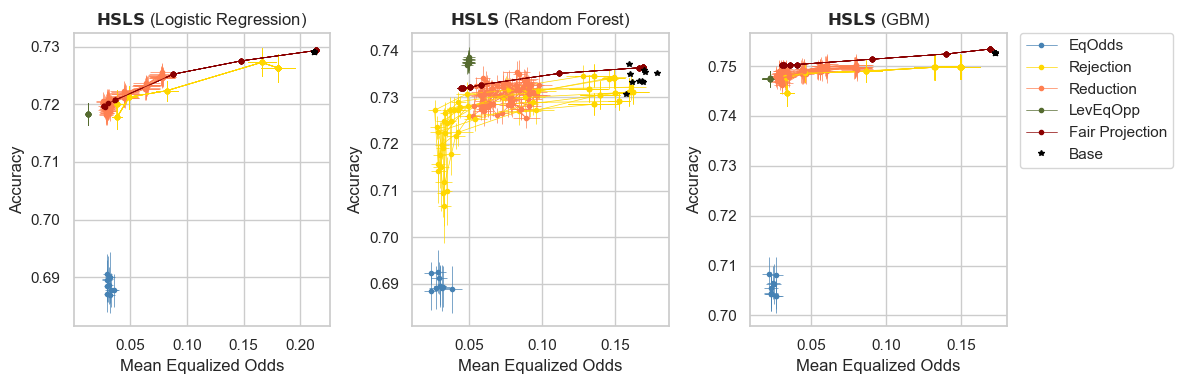

In [4]:
dataset = 'hsls'
fair = 'eo'
mp_name = 'ce' 

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for seed in range(33,43):
    plot_dataset(dataset, 'logit', axes[0], fair, mp_name, seed, alpha= 0.6)
    plot_dataset(dataset, 'rf', axes[1], fair, mp_name, seed, alpha= 0.6)
    plot_dataset(dataset, 'gbm', axes[2], fair, mp_name, seed, alpha= 0.6)
lines = axes[0].get_lines()
plt.legend(handles = lines[:6], labels = ["EqOdds","Rejection","Reduction","LevEqOpp","Fair Projection","Base"], 
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()

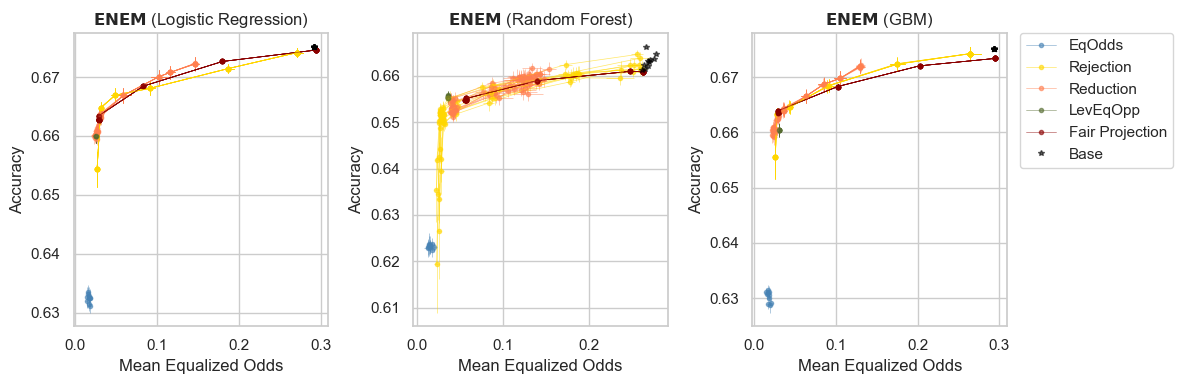

In [5]:
dataset = 'enem'
fair = 'eo'
mp_name = 'ce' 

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for seed in range(33,43):
    plot_dataset(dataset, 'logit', axes[0], fair, mp_name, seed, alpha= 0.6)
    plot_dataset(dataset, 'rf', axes[1], fair, mp_name, seed, alpha= 0.6)
    plot_dataset(dataset, 'gbm', axes[2], fair, mp_name, seed, alpha= 0.6)
lines = axes[0].get_lines()
plt.legend(handles = lines[:6], labels = ["EqOdds","Rejection","Reduction","LevEqOpp","Fair Projection","Base"], 
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()


In [6]:
# option: hsls/enem/adult
data = "enem"
# option: logit, rf, gbm
model_base = 'rf'
score_original, score_hardt, score_reduction, score_rejection, score_leverage, score_mp = process_scores_per_itr(data, model_base, fair='eo', start_seed = 33, end_seed = 42)


In [7]:
v1 = []
v2 = []
threshold = .5

for i in range(10):
    s = np.squeeze(score_original[i])
    v1.append(np.where(s >= threshold, 1, 0).std(axis=0))
    v2.append(np.squeeze(score_reduction[i]).std(axis=0))

v1 = np.concatenate(v1)
v2 = np.concatenate(v2)

ix = (v1 >0.01) | (v2>0.01)
v1 = v1[ix]
v2 = v2[ix]

a = np.around(v1,decimals=1)
unique, counts = np.unique(a, return_counts=True)

print(unique,counts)
print(counts[0]/sum(counts))

[0.  0.3 0.4 0.5] [21250  8182  5648 10862]
0.46253972399982585


[None, None, None, None, None, None, None, None]

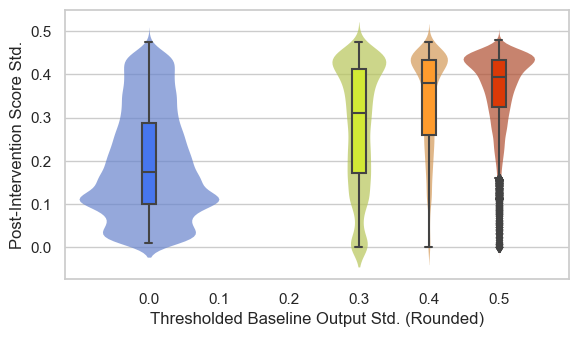

In [8]:
plt.rcParams['figure.figsize'] = 6.5, 4.8
# v1 thresholded baseline; v2 reduction
ix = (v1 >0.01) | (v2>0.01)
v1 = v1[ix]
v2 = v2[ix]

a = np.around(v1,decimals=1)
unique, counts = np.unique(a, return_counts=True)

plt.rcParams['figure.figsize'] = 6.5, 3.5
ax = sns.violinplot(x=a,y=v2,palette="turbo",
                    order=[0.0,0.1,0.2,.3,.4,.5],
                    scale='count',
                    inner='box',
                    width=2,
                    saturation=0.6,
                   linewidth=0)
sns.boxplot(x=a, y=v2,palette="turbo",width=0.2,order=[0.0,0.1,0.2,.3,.4,.5], boxprops={'zorder': 2}, ax=ax,saturation=1)
# ax.set_xticks(unique)
# ax.set_xticklabels([str(x) for x in unique])
plt.xlim([-1.2,6])
plt.xlabel('Thresholded Baseline Output Std. (Rounded)')
plt.ylabel('Post-Intervention Score Std.')
#plt.title('Distribution of Post-Intervention Score Std. by Thresholded Baseline Output Std.')
plt.setp(ax.collections, alpha=.7)
#plt.savefig('violin.pdf', format='pdf',dpi=100,bbox_inches='tight')


[Text(0.0, 0, '0%'), Text(50.0, 0, '50%')]

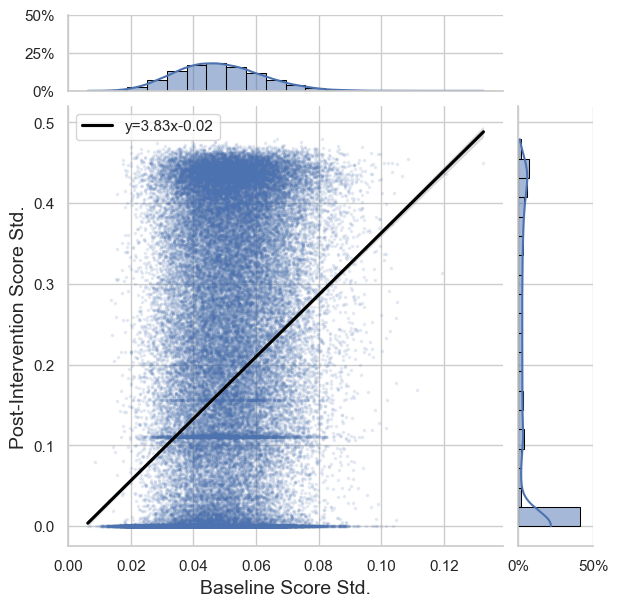

In [9]:
plt.rcParams['figure.figsize'] = 6.5, 4.8
# v1 baseline; v2 reduction
v1 = []
v2 = []
for i in range(10):
    v1.append(np.squeeze(score_original[i]).std(axis=0))
    v2.append(np.squeeze(score_reduction[i]).std(axis=0))

v1 = np.concatenate(v1)
v2 = np.concatenate(v2)
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(v1,v2)

h = sns.jointplot(x=v1,y=v2,
              kind="reg",
              marginal_ticks = True,
              marginal_kws={'bins':20,'stat':"percent",'edgecolor':"black", 'linewidth':.75},
              marker='.',
              scatter_kws={'s':10,'alpha':0.1},
              joint_kws={'line_kws':{'color':'black','label':"y={0:.2f}x{1:.2f}".format(slope,intercept)}})
plt.legend()
h.set_axis_labels('Baseline Score Std.','Post-Intervention Score Std.',
                  fontsize=14)
# h.ax_marg_y.set_ylim(0, 20)


# # Set y-label to "percentage"
# h.ax_marg_y.set_ylabel("Percentage")
# h.ax_marg_x.set_ylabel("Percentage")
# plt.xlabel('Baseline Score Standard Deviation')
# plt.ylabel('Post-Intervention Score Standard Deviation')
h.ax_marg_x.set_ylim(0,50)
h.ax_marg_y.set_xlim(0,50)

vals = h.ax_marg_x.get_yticks()
vals = ['{:,.0%}'.format(x/100) for x in vals]
h.ax_marg_x.set_yticklabels(vals)

vals = h.ax_marg_y.get_xticks()
vals = ['{:,.0%}'.format(x/100) for x in vals]
h.ax_marg_y.set_xticklabels(vals)
#h.ax_marg_y.set_major_formatter(mtick.PercentFormatter())
#plt.savefig('not-thresholded.png', format='png',dpi=100,bbox_inches='tight')

Text(0, 0.5, 'Density of Samples in Bins')

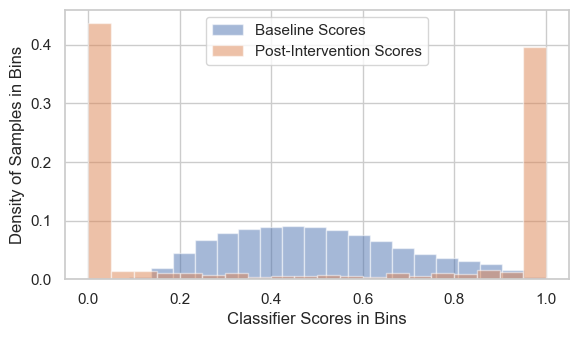

In [36]:
v1 = []
v2 = []
for i in range(10):
    for j in range(10):
        v1.append(np.squeeze(score_original[i][j]))
        v2.append(np.squeeze(score_reduction[i][j]))

v1 = np.concatenate(v1)
v2 = np.concatenate(v2)

plt.rcParams['figure.figsize'] = 6.5, 3.5
plt.hist(v1, bins=20, alpha=0.5, label='Baseline Scores', weights=np.ones(len(v1)) / len(v1))
plt.hist(v2, bins=20, alpha=0.5, label='Post-Intervention Scores', weights=np.ones(len(v2)) / len(v2))
# plt.legend(loc='upper right')
plt.legend()
plt.xlabel('Classifier Scores in Bins')
plt.ylabel('Density of Samples in Bins')
#plt.savefig('red_base_score_histogram.pdf', format='pdf',dpi=200,bbox_inches='tight')


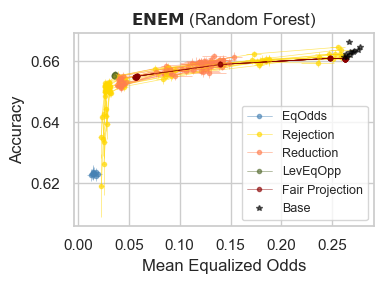

In [38]:
# dataset = 'enem'
# fair = 'eo'
# mp_name = 'ce' 

# fig, ax = plt.subplots(1, 1, figsize=(4, 3))
# for seed in range(33,43):
#     plot_dataset(dataset, 'rf', ax, fair, mp_name, seed, alpha= 0.6)
# lines = ax.get_lines()
# plt.legend(handles = lines[:6], labels = ["EqOdds","Rejection","Reduction","LevEqOpp","Fair Projection","Base"],fontsize=9)
# plt.tight_layout()
# plt.savefig('fair_acc_tradeoff.pdf', format='pdf',dpi=100,bbox_inches='tight')

[0.  0.3 0.4 0.5] [21250  8182  5648 10862]
0.46253972399982585


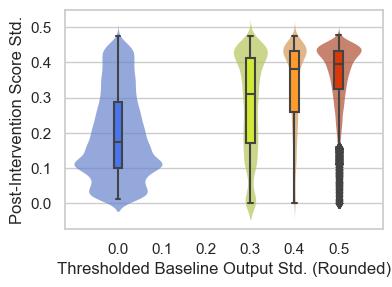

In [41]:
# v1 = []
# v2 = []
# threshold = .5

# for i in range(10):
#     s = np.squeeze(score_original[i])
#     v1.append(np.where(s >= threshold, 1, 0).std(axis=0))
#     v2.append(np.squeeze(score_reduction[i]).std(axis=0))

# v1 = np.concatenate(v1)
# v2 = np.concatenate(v2)

# ix = (v1 >0.01) | (v2>0.01)
# v1 = v1[ix]
# v2 = v2[ix]

# a = np.around(v1,decimals=1)
# unique, counts = np.unique(a, return_counts=True)

# print(unique,counts)
# print(counts[0]/sum(counts))

# # v1 thresholded baseline; v2 reduction
# ix = (v1 >0.01) | (v2>0.01)
# v1 = v1[ix]
# v2 = v2[ix]

# a = np.around(v1,decimals=1)
# unique, counts = np.unique(a, return_counts=True)

# plt.rcParams['figure.figsize'] = 4.1, 2.85
# ax = sns.violinplot(x=a,y=v2,palette="turbo",
#                     order=[0.0,0.1,0.2,.3,.4,.5],
#                     scale='count',
#                     inner='box',
#                     width=2,
#                     saturation=0.6,
#                    linewidth=0)
# sns.boxplot(x=a, y=v2,palette="turbo",width=0.2,order=[0.0,0.1,0.2,.3,.4,.5], boxprops={'zorder': 2}, ax=ax,saturation=1)
# # ax.set_xticks(unique)
# # ax.set_xticklabels([str(x) for x in unique])
# plt.xlim([-1.2,6])
# plt.xlabel('Thresholded Baseline Output Std. (Rounded)')
# plt.ylabel('Post-Intervention Score Std.')
# #plt.title('Distribution of Post-Intervention Score Std. by Thresholded Baseline Output Std.')
# plt.setp(ax.collections, alpha=.7)
# plt.savefig('violin.pdf', format='pdf',dpi=100,bbox_inches='tight')

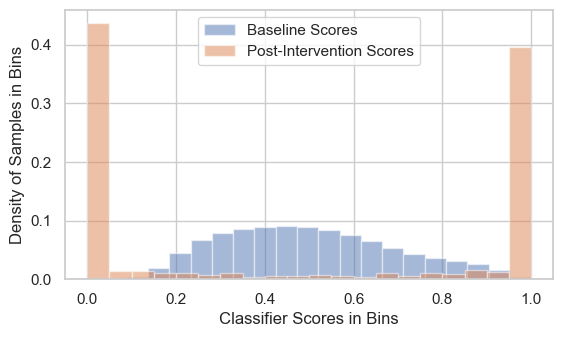

In [43]:
v1 = []
v2 = []
for i in range(10):
    for j in range(10):
        v1.append(np.squeeze(score_original[i][j]))
        v2.append(np.squeeze(score_reduction[i][j]))

v1 = np.concatenate(v1)
v2 = np.concatenate(v2)

plt.rcParams['figure.figsize'] = 6.3, 3.5
plt.hist(v1, bins=20, alpha=0.5, label='Baseline Scores', weights=np.ones(len(v1)) / len(v1))
plt.hist(v2, bins=20, alpha=0.5, label='Post-Intervention Scores', weights=np.ones(len(v2)) / len(v2))
# plt.legend(loc='upper right')
plt.legend()
plt.xlabel('Classifier Scores in Bins')
plt.ylabel('Density of Samples in Bins')
plt.savefig('red_base_score_histogram.pdf', format='pdf',dpi=200,bbox_inches='tight')